In [1]:
from typing import Tuple, List

import numpy as np
import matplotlib.pyplot as plt
import fastdtw
%matplotlib inline

### Пример работы.

In [28]:
# сгенерируем два временных ряда, сдвинутых относительно друг друга

In [181]:
ts_1 = np.array([np.sin(x) for x in range(0, 30)])
ts_2 = np.array([np.sin(x) for x in range(5, 35)])

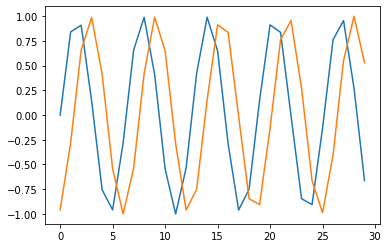

In [3]:
# видим, что обычная евклидова мера в данном случае сработает плохо 
plt.plot(ts_1)
plt.plot(ts_2)

In [182]:
dtw, path = fastdtw.dtw(ts_1, ts_2)

In [183]:
dtw

7.4277709902429745

In [184]:
path

[(0, 0),
 (0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (26, 27),
 (27, 28),
 (28, 29),
 (29, 29)]

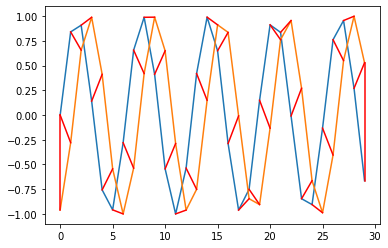

In [7]:
# в то время, как dynamic time warping ставит в соответствие именно те точки, которые нужны
plt.plot(ts_1)
plt.plot(ts_2)
for pair in path:
    plt.plot(pair, [ts_1[pair[0]], ts_2[pair[1]]], 'r-')

## Практика: наивная имплементация DTW.

### Задание 1. Реализуйте матрицу расстояний d_matrix

In [34]:
def make_distance_matrix(ts_1: np.array, ts_2: np.array) -> np.array:
    """
    Должна вернуть матрицу размерности (len(ts_1), len(ts_2)),
    в которой каждый элемент (i, j) равен евклидовому расстоянию от 
    точки ts_1[i] до точки ts_2[j]
    """
    # ваш код здесь
    d_matrix=[]
    for _ts_2 in ts_2:
        d_matrix.append(abs(ts_1-_ts_2))
    return np.array(d_matrix)

In [158]:
ts_1 = np.array([1,5,4,2])
ts_2 = np.array([1,2,4,1])
d_matrix=make_distance_matrix(ts_1, ts_2)

### Задание 2. Реализуйте функцию поиска соседей get_ancestors. 

* принимает на входе произвольные координаты `i, j` и матрицу `matrix`
* для данных координат функция должна получить значения его соседей сверху `(i-1, j)`, слева `(i, j-1)` и по диагонали наверху `(i-1, j-1)`
* если соседа нет, вернуть бесконечность `np.inf`

In [107]:
def get_ancestors(i: int, j: int, matrix: np.array) -> Tuple[int]:
    up = matrix[i-1][j] if i else np.inf
    left = matrix[i][j-1] if j else np.inf
    diag = matrix[i-1][j-1] if j and i else np.inf
    up = matrix[0][0] if i==0 and j==0 else up #значение 0,0 берем из матрицы 0,0
    # ваш код здесь
    return up, left, diag

### Задание 3. Реализуйте матрицу разностей D.

* принимает на вход матрицу расстояний `d_matrix`
* инициализирует матрицу D нулями (размерность матрицы равна размерности d_matrix)
* в двойном цикле проходится по всем элементам матрицы
* для каждого элемента i, j заполняет его значение по формуле `D(i, j) = d_{ij} + min(D_{i-1, j}, D_{i-1, j-1}, D_{i, j-1}`

In [108]:
def make_difference_matrix(d_matrix):
    """
    Должна возвращать матрицу D, в которой каждый элемент высчитывается как 
    D(i, j) = d_{ij} + min(D_{i-1, j}, D_{i-1, j-1}, D_{i, j-1})
    """
    # <ваш код здесь>
    D = np.zeros(d_matrix.shape)
    for i in range(d_matrix.shape[0]):
        for j in range(d_matrix.shape[1]):
            D[i][j]=d_matrix[i][j]+min(get_ancestors(i, j, D))
    return D

In [111]:
D = make_difference_matrix(d_matrix)

### Задание 4. Реализуйте функцяи поиска наименьшего пути и значения dtw. 

* принимает на входе два временных ряда, матрицу разностей D и матрицу расстояний d_matrix
* инициализирует путь пустым списком и добавляет туда первую коррдинату (len(ts_1)-1, len(ts_2)-1))
* проходит с нижнего правого до верхнего левого угла и добавляет координаты соседей с минимальным значением D
* переворачивает список пути
* расчитывает dtw по формуле `for i, j in path: dtw += d_matrix[i, j]`
* возвращает путь и значение dtw

In [179]:
def find_path_and_dtw(ts_1: np.array, ts_2: np.array, D: np.array, d_matrix: np.array) -> Tuple[List[Tuple], float]:
    """
    Функция должна возвращать путь от точки (len(ts_1), len(ts_2)) до точки (0, 0)
    в виде списка из координат (i, j), а также значение dtw. 
    """
    path = []
    dtw = 0
    path_dict={ 0:'up', 1:'left', 2:'diag'}
    i = len(ts_1)-1
    j = len(ts_2)-1

    path.append((i, j))
    
    while i or j:
        get_anc = get_ancestors(i, j, D)
        route = path_dict[np.where(get_anc == min(get_anc))[0][0]]
        if route == 'up': i-=1
        if route == 'left': j-=1
        if route == 'diag': i-=1; j-=1
        path.append((i, j))

    # <ваш код здесь>
   
    path = path[::-1]
    
    for i, j in path:
        dtw += d_matrix[i, j] 
    return path, dtw

In [185]:
d_matrix = make_distance_matrix(ts_1, ts_2)

In [186]:
D = make_difference_matrix(d_matrix)

In [187]:
find_path_and_dtw(ts_1, ts_2, D, d_matrix)

([(0, 0),
  (1, 0),
  (2, 1),
  (3, 2),
  (4, 3),
  (5, 4),
  (6, 5),
  (7, 6),
  (8, 7),
  (9, 8),
  (10, 9),
  (11, 10),
  (12, 11),
  (13, 12),
  (14, 13),
  (15, 14),
  (16, 15),
  (17, 16),
  (18, 17),
  (19, 18),
  (20, 19),
  (21, 20),
  (22, 21),
  (23, 22),
  (24, 23),
  (25, 24),
  (26, 25),
  (27, 26),
  (28, 27),
  (29, 28),
  (29, 29)],
 7.4277709902429745)